# Session 4 Asynchronous Version

We went through the below notebook together in a live lecture. I have written in explanations and included solutions to practice problems as dropdowns below so you should be able to read through and try out this notebook. I have included the data as an attachment to my email.

You can also watch the full recording here to see the live coding/explanations:

https://us06web.zoom.us/rec/share/PxhzhXsbWVKagueoY3IQjjACwCtj5tot0Vz7u2IeLgEaTOnsmWfvrhAueq1WlNHF.1aRX3QL8q5XuWKgB



This content and example is modified from the Software Carpentries Programming with Python Workshop (CC-BY 4.0).

# Set-up

Our imaginary colleague “Dr. Maverick” has invented a new miracle drug that promises to cure arthritis inflammation flare-ups after only 3 weeks since initially taking the medication! Naturally, we wish to see the clinical trial data, and after months of asking for the data they have finally provided us with a CSV spreadsheet containing the clinical trial data.

The CSV file contains the number of inflammation flare-ups per day for the 60 patients in the initial clinical trial, with the trial lasting 40 days. Each row corresponds to a patient, and each column corresponds to a day in the trial. Once a patient has their first inflammation flare-up they take the medication and wait a few weeks for it to take effect and reduce flare-ups.

To see how effective the treatment is we would like to:

- Calculate the average inflammation per day across all patients.
- Plot the result to discuss and share with colleagues.

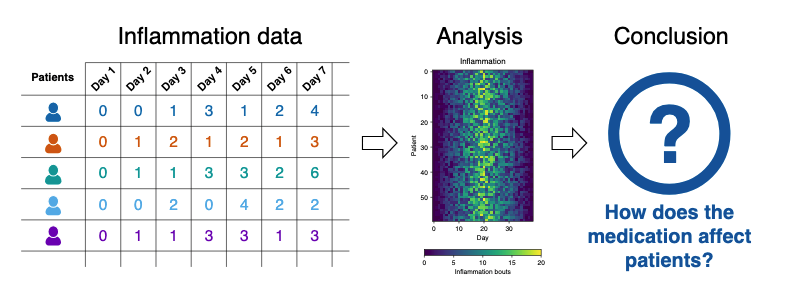

First, we need to load in the data. Watch the first few minutes of the recording to see how.

Next, we need to use a numpy function that allows us to load in the excel spreadsheet as a numpy array. We can use `np.loadtxt`:

In [2]:
import numpy as np

data = np.loadtxt(fname='inflammation-01.csv', delimiter=',')

print(data)

[[0. 0. 1. ... 3. 0. 0.]
 [0. 1. 2. ... 1. 0. 1.]
 [0. 1. 1. ... 2. 1. 1.]
 ...
 [0. 1. 1. ... 1. 1. 1.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 1. ... 1. 1. 0.]]


# Analyzing Patient Data

The first thing we want to check is the shape of the numpy array containing our data, to make sure it matches what Dr. Maverick told us (60 patients/rows, 40 days/columns)

In [3]:
np.shape(data)

(60, 40)

## Grabbing Subsets

Now, let's grab our first patient's inflammation levels on the first day.

Remember with indexing in Python that we write the array variable name followed by square brackets. Within those brackets we put the row index, then a comma, then the column index. Also, Python is zero-based indexing so the first row and column are index 0.

In [4]:
data[0, 0]

0.0

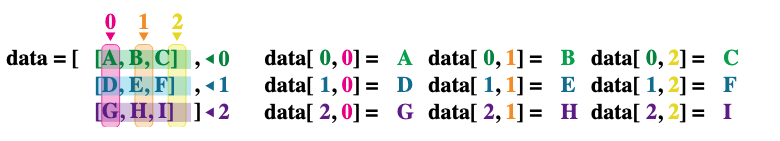

In [5]:
data[29, 19]

16.0

 Click here to see soution


**Practice Problem:** Write code to grab the fifth patient's data on Day 7

In [ ]:
# @markdown Click here to see soution

data[4, 6]

If we want to grab multiple data points, we can use slicing. If we want to grab multiple rows, instead of a single row index, we can use a starting index followed by a colon followed by a stopping index. So `data[0:4, 0]` will grab row index 0 to row index 3, and the first column. The stopping index is non-inclusive - this means that it'll grab rows up to that index but not including it. So we do not include row with index 4.

In [6]:
data[0:4, 0]

array([0., 0., 0., 0.])

We can do the same thing to grab multiple columns. The following code grabs the data in the first four rows and first ten columns.

In [7]:
data[0:4, 0:10]

array([[0., 0., 1., 3., 1., 2., 4., 7., 8., 3.],
       [0., 1., 2., 1., 2., 1., 3., 2., 2., 6.],
       [0., 1., 1., 3., 3., 2., 6., 2., 5., 9.],
       [0., 0., 2., 0., 4., 2., 2., 1., 6., 7.]])

If we drop the starting index, Python will assume we wanted 0 (i.e. starting at the first row or column):

In [8]:
data[:4, :10]

array([[0., 0., 1., 3., 1., 2., 4., 7., 8., 3.],
       [0., 1., 2., 1., 2., 1., 3., 2., 2., 6.],
       [0., 1., 1., 3., 3., 2., 6., 2., 5., 9.],
       [0., 0., 2., 0., 4., 2., 2., 1., 6., 7.]])

If we drop the stopping index, Python will assume we want to grab everything up to and including the last row or column. The following code grabs the first 4 rows and all columns from the 11th column to the last one.

In [9]:
data[:4, 10:]

array([[ 3.,  3., 10.,  5.,  7.,  4.,  7.,  7., 12., 18.,  6., 13., 11.,
        11.,  7.,  7.,  4.,  6.,  8.,  8.,  4.,  4.,  5.,  7.,  3.,  4.,
         2.,  3.,  0.,  0.],
       [10., 11.,  5.,  9.,  4.,  4.,  7., 16.,  8.,  6., 18.,  4., 12.,
         5., 12.,  7., 11.,  5., 11.,  3.,  3.,  5.,  4.,  4.,  5.,  5.,
         1.,  1.,  0.,  1.],
       [ 5.,  7.,  4.,  5.,  4., 15.,  5., 11.,  9., 10., 19., 14., 12.,
        17.,  7., 12., 11.,  7.,  4.,  2., 10.,  5.,  4.,  2.,  2.,  3.,
         2.,  2.,  1.,  1.],
       [10.,  7.,  9., 13.,  8.,  8., 15., 10., 10.,  7., 17.,  4.,  4.,
         7.,  6., 15.,  6.,  4.,  9., 11.,  3.,  5.,  6.,  3.,  3.,  4.,
         2.,  3.,  2.,  1.]])

If we drop both the starting and stopping index and just include a colon, we will grab all of the rows or columns. The following code grabs all of the first row (every single column):

 Click here to see solution


In [10]:
data[0, :]

array([ 0.,  0.,  1.,  3.,  1.,  2.,  4.,  7.,  8.,  3.,  3.,  3., 10.,
        5.,  7.,  4.,  7.,  7., 12., 18.,  6., 13., 11., 11.,  7.,  7.,
        4.,  6.,  8.,  8.,  4.,  4.,  5.,  7.,  3.,  4.,  2.,  3.,  0.,
        0.])

**Practice Problem:** Write code to grab all of the patient's data on the 8th day

In [ ]:
# @markdown Click here to see solution

data[:, 7]

"""
Each day is a different column so we
want to grab a whole column. We use a
colon in the "row place" to indicate
we want to grab all rows. The 8th day
is the column with index 7 due to
zero-based indexing. So, we get data[:, 7]
"""

## Analyzing data

Let's take a look at the overall inflammation value (over every day and every patient):

 Click here to see solution


In [11]:
mean_of_data = np.mean(data)

print(mean_of_data)

6.14875


In [12]:
max_val = np.max(data)
min_val = np.min(data)
std_val = np.std(data)

print(max_val)
print(min_val)
print(std_val)

20.0
0.0
4.613833197118566


**Practice Problem** Write code to grab the max inflammation value for the third patient

In [ ]:
# @markdown Click here to see solution

np.max(data[2, :])

"""
First we can grab all of the data for
the third patient using the indexing
tricks we just learned about. So, we
can grab data[2, :]. Then, we can
use that as the input to our np.max
function, allowing us to compute the
max value of just that row
"""


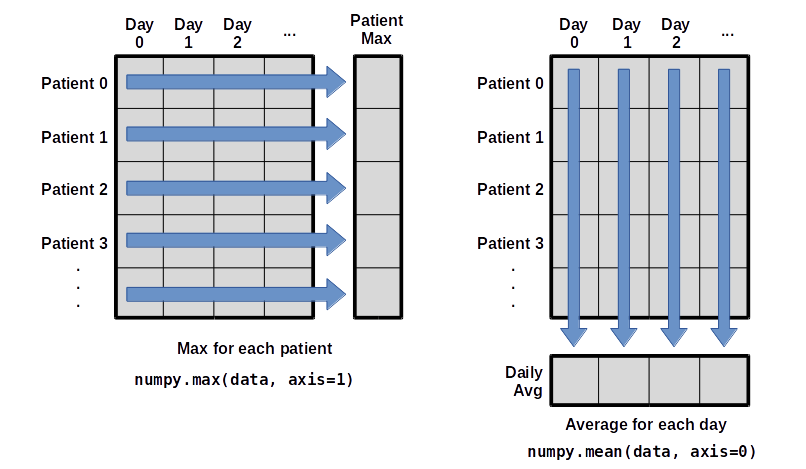

If we want to grab the max for each patient at once, we need to use the axis argument in the `np.max` function. If we want to compute something for every row, we use axis=0. If we want to compute something for every column, we use axis=1. This is summarized in the figure above.

The following code gets the max for every patient (row):

 Click here for solution


In [13]:
np.max(data, axis=1)

array([18., 18., 19., 17., 17., 18., 17., 20., 17., 18., 18., 18., 17.,
       16., 17., 18., 19., 19., 17., 19., 19., 16., 17., 15., 17., 17.,
       18., 17., 20., 17., 16., 19., 15., 15., 19., 17., 16., 17., 19.,
       16., 18., 19., 16., 19., 18., 16., 19., 15., 16., 18., 14., 20.,
       17., 15., 17., 16., 17., 19., 18., 18.])

We know we have 60 patients, so we can check the shape of this to make sure there are 60 elements (one number per patient):

In [14]:
np.shape(np.max(data, axis=1))

(60,)

**Practice Problem** Get the mean inflammation value on each day.

In [ ]:
# @markdown Click here for solution

np.mean(data, axis=0)

"""
Here we want to use axis=0 as we want
the mean per column
"""

 Click here for solution


# Visualizing Patient Data

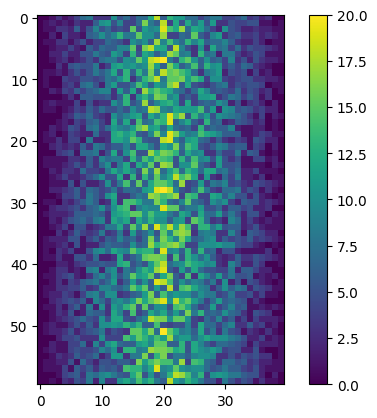

In [15]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
im = ax.imshow(data)
plt.colorbar(im)

 Click here for solution


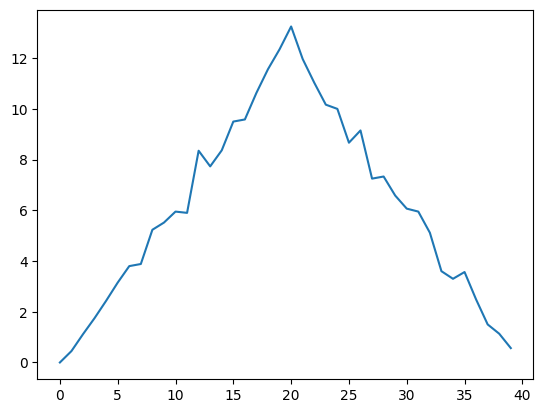

In [16]:
ave_inflammation = np.mean(data, axis=0)

fig, ax = plt.subplots()
ax.plot(ave_inflammation)

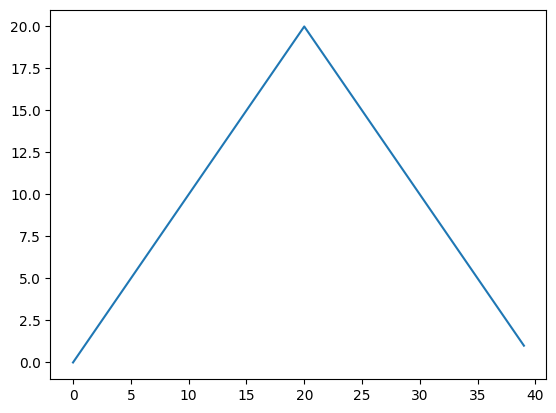

In [17]:
fig, ax = plt.subplots()
ax.plot(np.max(data, axis=0))

**Practice Problem** Create a plot showing the standard deviation (numpy.std) of the inflammation data for each day across all patients.

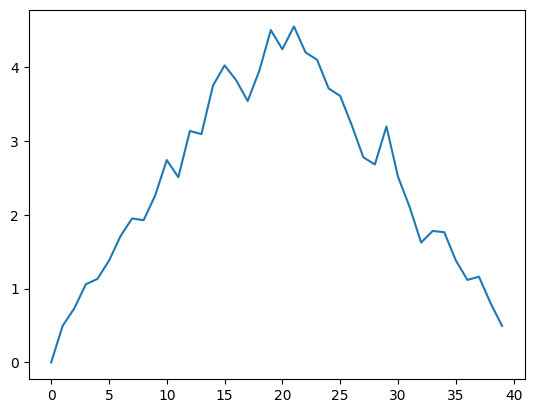

In [18]:
# @markdown Click here for solution
fig, ax = plt.subplots()
ax.plot(np.std(data, axis=0))


**Practice Problem** Create a plot that shows patient 15 vs patient 2s inflammation. Each data point should be a different day.

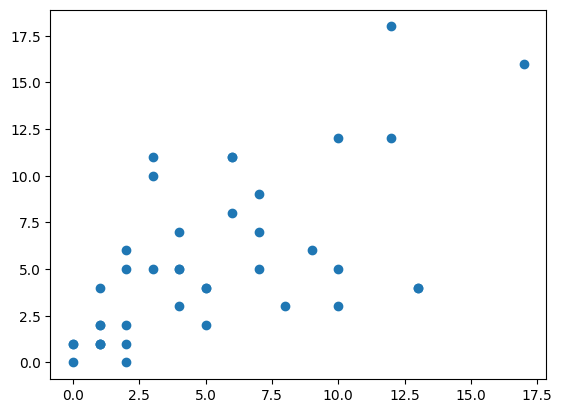

In [19]:
# @markdown Click here for solution

fig, ax = plt.subplots()

ax.plot(data[14, :], data[1, :], 'o')

# Looping over data

In [20]:
odds = np.array([1, 3, 5, 7])

print(odds[0])
print(odds[1])
print(odds[2])

1
3
5


In [21]:
for num in odds:
  print(num)

1
3
5
7


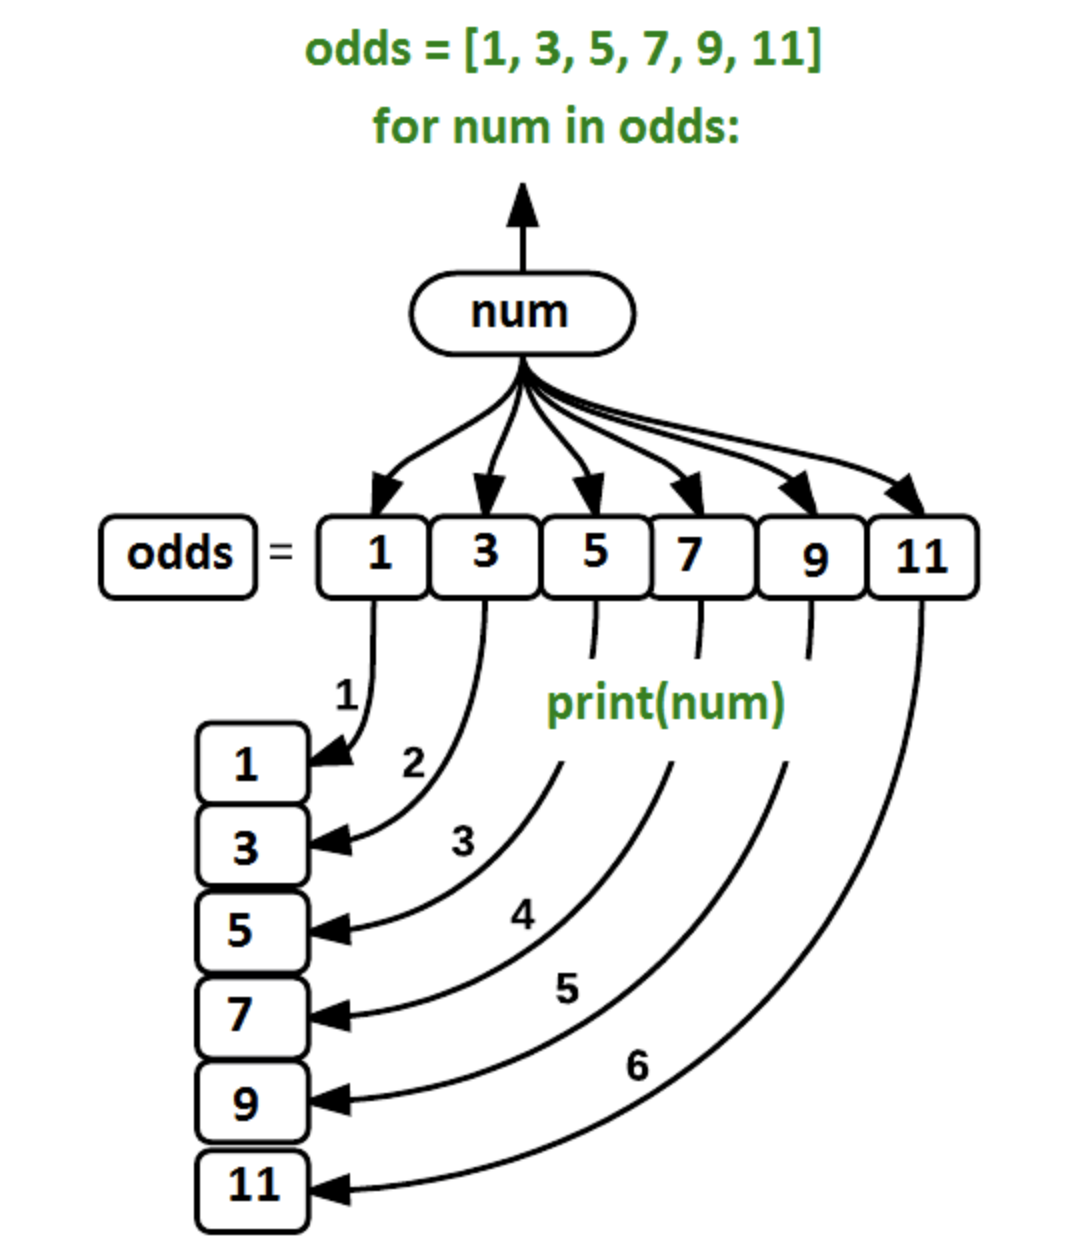

In [22]:
numbers = np.array([4, 10, 2])

summed = 0

for num in numbers:
  summed = summed + num

print(summed)

16


We can use a for loop to create a plot for all of our datasets:

In [24]:
file_num = 2

filename = f'inflammation-0{file_num}.csv'
print(filename)

inflammation-02.csv


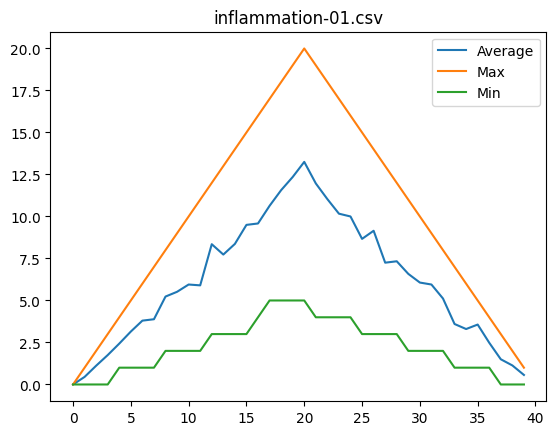

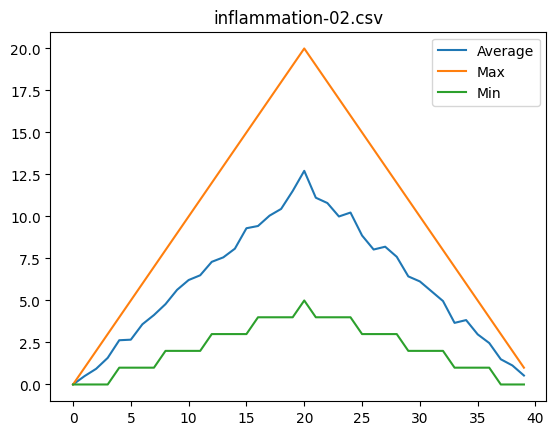

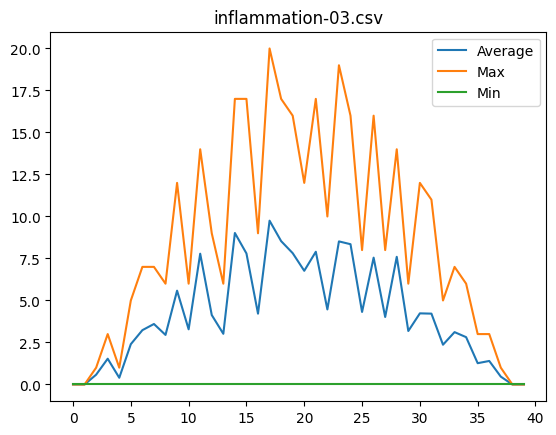

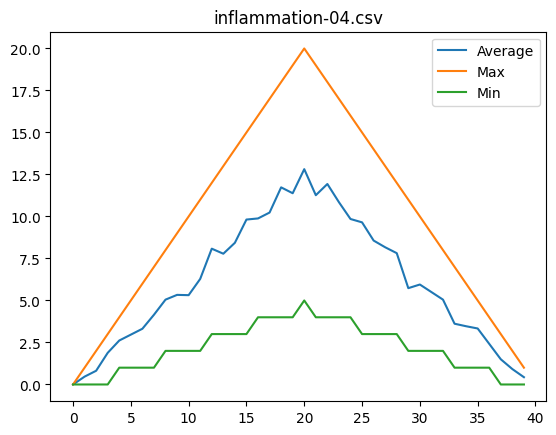

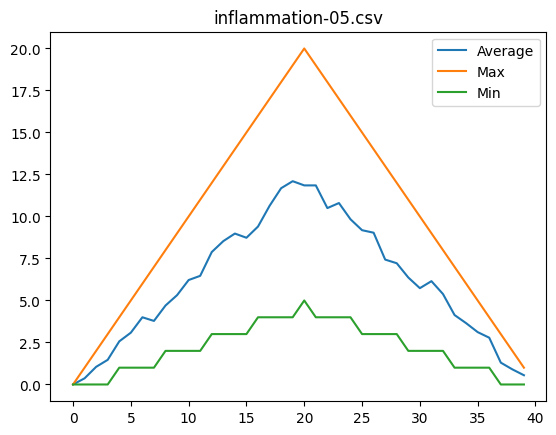

In [26]:
for file_num in range(1, 6):
    filename = f'inflammation-0{file_num}.csv'
    data = np.loadtxt(fname=filename, delimiter=',')

    fig, ax = plt.subplots()

    ax.plot(np.mean(data, axis=0), label='Average')
    ax.plot(np.max(data, axis=0), label='Max')
    ax.plot(np.min(data, axis=0), label='Min')
    plt.legend()
    ax.set(title = filename)
